## Req

In [1]:
import re
import unicodedata
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import textstat

from matplotlib.ticker import PercentFormatter
from tqdm.notebook import tqdm

from textblob import TextBlob
from textblob_nl import PatternAnalyzer

warnings.filterwarnings("ignore")

# set language to dutch 
textstat.set_lang("nl")

# progress bar when apply functions to dataframe
tqdm.pandas()

# better quality plots
%config InlineBackend.figure_format = "retina"

# Title font size
TITLE_SIZE = 14


# (merged) Data inladen

In [21]:
import pandas as pd

# File paths
file1 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_20250311.csv'
file2 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_brandstof_20250310.csv'
output_file_usb = r'D:\merged_dataset_full.csv'

# Define column selections for each dataset
cols_file1 = ['Kenteken', 'Voertuigsoort', 'Merk', 'Datum eerste toelating']
cols_file2 = ['Kenteken', 'Brandstof omschrijving', 'CO2 uitstoot gecombineerd', 
              'Uitlaatemissieniveau', 'CO2 emissieklasse', 
              'Max vermogen 60 minuten', 'Netto max vermogen elektrisch']

# Step 1: Read the fuel dataset
df_brandstof = pd.read_csv(file2, usecols=cols_file2, dtype=str)

# Step 2: Read and process the vehicle dataset chunkwise
chunk_size = 1000000  # 1 million rows at a time
chunk_iterator = pd.read_csv(file1, usecols=cols_file1, dtype=str, chunksize=chunk_size)

# Collection of processed chunks
merged_chunks = []

for chunk in chunk_iterator:
    # Convert 'Datum eerste toelating' safely (Fixing 1970-01-01 issue)
    chunk['Datum eerste toelating'] = pd.to_datetime(chunk['Datum eerste toelating'], format='%Y%m%d', errors='coerce')

    # Debug: Check date conversion before merging
    print("Before merge:", chunk[['Kenteken', 'Datum eerste toelating']].dropna().head())

    # Merge datasets
    merged_chunk = chunk.merge(df_brandstof, on='Kenteken', how='left')

    # Debug: Check dates after merging
    print("After merge:", merged_chunk[['Kenteken', 'Datum eerste toelating']].dropna().head())

    # Append chunk to the list
    merged_chunks.append(merged_chunk)

# Combine all chunks
df_merged = pd.concat(merged_chunks, ignore_index=True)

# Save to a CSV file
df_merged.to_csv(output_file_usb, index=False)

print(f"The file has been saved to your USB stick: {output_file_usb}")


Before merge:   Kenteken Datum eerste toelating
0   TFX83D             2011-06-30
1   TFX83F             2002-06-30
2   TFX83G             2019-06-30
3   TFX83H             1956-06-30
4   TFX83J             1964-06-30
After merge:   Kenteken Datum eerste toelating
0   TFX83D             2011-06-30
1   TFX83F             2002-06-30
2   TFX83G             2019-06-30
3   TFX83H             1956-06-30
4   TFX83J             1964-06-30
Before merge:         Kenteken Datum eerste toelating
1000000   VFP42G             2020-03-13
1000001   VFP42J             2018-11-14
1000002   VFP42K             2020-02-27
1000003   VFP42N             2017-11-23
1000004   VFP42P             2020-03-20
After merge:   Kenteken Datum eerste toelating
0   VFP42G             2020-03-13
1   VFP42J             2018-11-14
2   VFP42K             2020-02-27
3   VFP42N             2017-11-23
4   VFP42P             2020-03-20
Before merge:         Kenteken Datum eerste toelating
2000000   WXPV40             2007-07-13


In [9]:
import pandas as pd

# File paths
file1 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_20250311.csv'
file2 = r'C:\Users\dylan\Thesis\GIT\Datasets\Open_Data_RDW__Gekentekende_voertuigen_brandstof_20250310.csv'
output_file_usb = r'D:\merged_dataset_full.csv'

# Choose the correct columns
cols_file1 = ['Kenteken', 'Voertuigsoort', 'Merk', 'Datum eerste toelating']
cols_file2 = ['Kenteken', 'Brandstof omschrijving', 'CO2 uitstoot gecombineerd', 
              'Uitlaatemissieniveau', 'CO2 emissieklasse', 
              'Max vermogen 60 minuten', 'Netto max vermogen elektrisch']

# Step 1: Read the fuel dataset
df_brandstof = pd.read_csv(file2, usecols=cols_file2, dtype=str)

# Step 2: Read and process the vehicle dataset chunkwise
chunk_size = 1000000  # 1 million rows at a time
chunk_iterator = pd.read_csv(file1, usecols=cols_file1, dtype=str, chunksize=chunk_size, parse_dates=['Datum eerste toelating'], dayfirst=True)

# Collection of processed chunks
merged_chunks = []

for chunk in chunk_iterator:
    # Optionally: Adjust date format if needed
    chunk['Datum eerste toelating'] = chunk['Datum eerste toelating'].astype(str)

    # Merge the current chunk with the fuel dataset
    merged_chunk = chunk.merge(df_brandstof, on='Kenteken', how='left')

    # Add to the list
    merged_chunks.append(merged_chunk)

# Combine all chunks
df_merged = pd.concat(merged_chunks, ignore_index=True)

# Save to a CSV file
df_merged.to_csv(output_file_usb, index=False)

print(f"The file has been saved to your USB stick: {output_file_usb}")

print(f"A single chunk processed and saved in: {output_file_usb}")



The file has been saved to your USB stick: D:\merged_dataset_full.csv
A single chunk processed and saved in: D:\merged_dataset_full.csv


In [12]:
from IPython.display import display

display(df_test.head())
display(df_test.info())




,index,Kenteken,Voertuigsoort,Merk,Datum eerste toelating,Brandstof omschrijving,CO2 uitstoot gecombineerd,Max vermogen 60 minuten,Netto max vermogen elektrisch,Uitlaatemissieniveau,CO2 emissieklasse,Jaar
0,1778393,WLZF01,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
1,1797675,WNBZ22,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
2,1805229,WNNN63,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
3,1838779,WPJV96,Aanhangwagen,ZELFBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970
4,1844107,WPSL58,Aanhangwagen,EIGENBOUW,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1970


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          159 non-null    int64         
 1   Kenteken                       159 non-null    object        
 2   Voertuigsoort                  159 non-null    object        
 3   Merk                           159 non-null    object        
 4   Datum eerste toelating         159 non-null    datetime64[ns]
 5   Brandstof omschrijving         149 non-null    object        
 6   CO2 uitstoot gecombineerd      0 non-null      object        
 7   Max vermogen 60 minuten        0 non-null      object        
 8   Netto max vermogen elektrisch  0 non-null      object        
 9   Uitlaatemissieniveau           11 non-null     object        
 10  CO2 emissieklasse              0 non-null      object        
 11  Jaar               

None

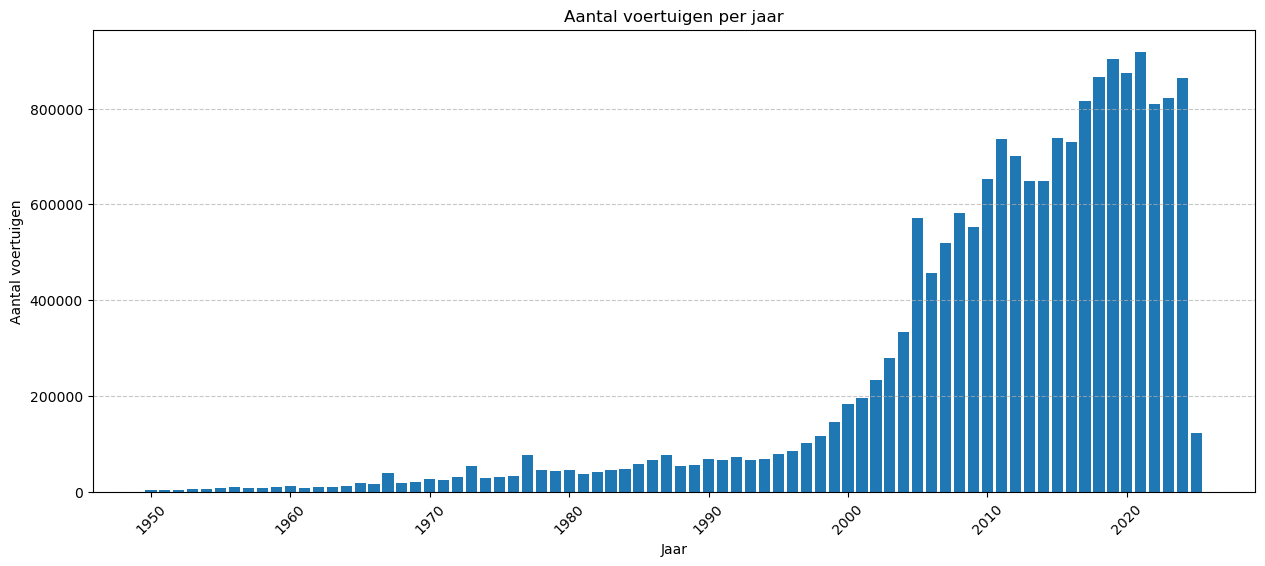

In [27]:



import matplotlib.pyplot as plt

# Count the number of vehicles per year
df_merged['Jaar'] = df_merged['Datum eerste toelating'].dt.year
vehicle_counts = df_merged.groupby('Jaar').size()

# Filter out unrealistic years (before 1950)
vehicle_counts = vehicle_counts[(vehicle_counts.index >= 1950) & (vehicle_counts.index <= 2025)]

# Plot the number of vehicles per year as a bar chart
plt.figure(figsize=(15, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values)
plt.xlabel('Jaar')
plt.ylabel('Aantal voertuigen')
plt.title('Aantal voertuigen per jaar')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


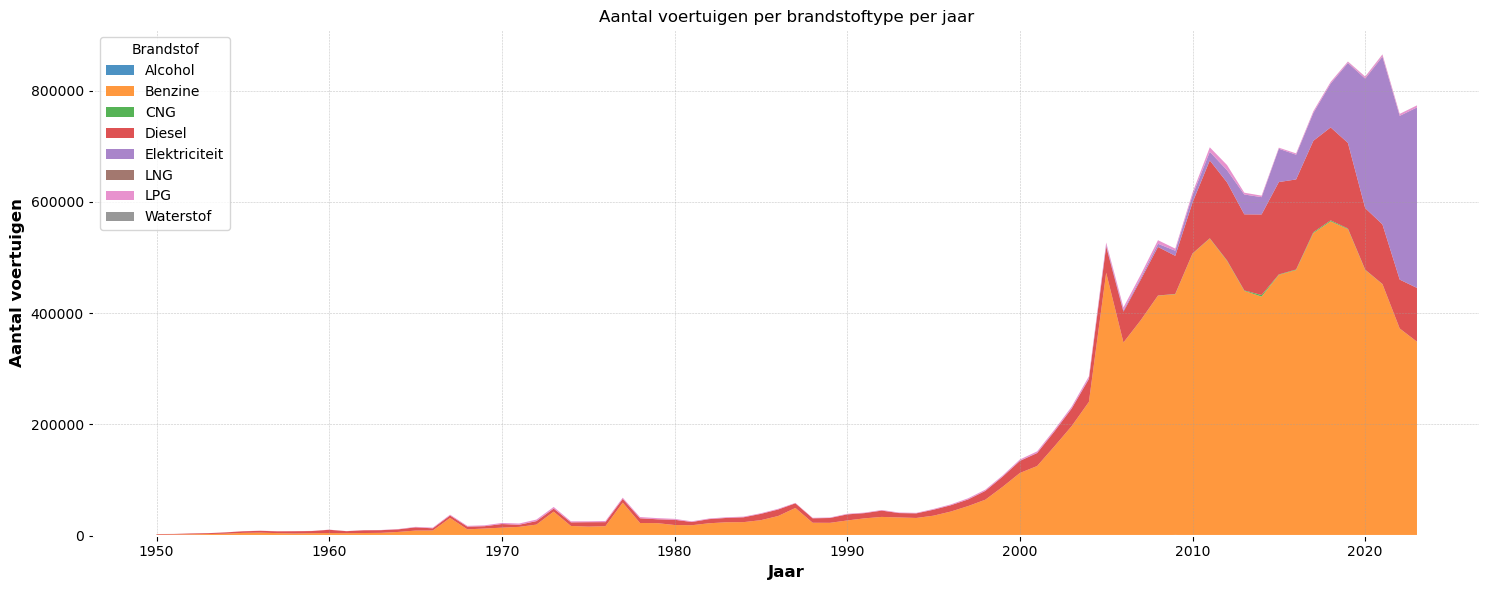

<Figure size 1500x600 with 0 Axes>

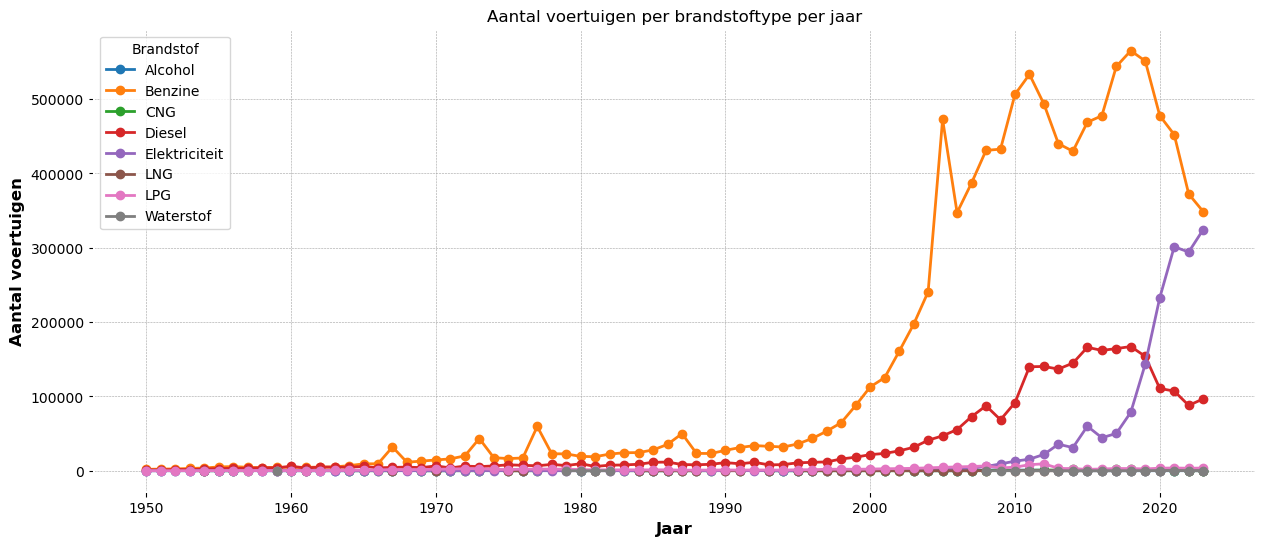

In [107]:
import matplotlib.pyplot as plt

# Group by year and fuel type, and count the occurrences
fuel_counts = df_merged.groupby(['Jaar', 'Brandstof omschrijving']).size().unstack()

# Filter data to include only years between 1950 and 2023
fuel_counts = fuel_counts[(fuel_counts.index >= 1950) & (fuel_counts.index <= 2023)]

# Prepare data for the stack plot
years = fuel_counts.index
fuel_types = fuel_counts.columns
values = [fuel_counts[col].fillna(0) for col in fuel_types]  # Replace NaN with 0

# Plot the stack plot
plt.figure(figsize=(15, 6))
plt.stackplot(years, values, labels=fuel_types, alpha=0.8)

plt.xlabel('Jaar')
plt.ylabel('Aantal voertuigen')
plt.title('Aantal voertuigen per brandstoftype per jaar')
plt.legend(title='Brandstof', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15, 6))
fuel_counts.plot(kind='line', figsize=(15, 6), marker='o')

plt.xlabel('Jaar')
plt.ylabel('Aantal voertuigen')
plt.title('Aantal voertuigen per brandstoftype per jaar')
plt.legend(title='Brandstof')
plt.grid(True)
plt.show()

In [32]:
import pandas as pd

# File paths
input_file = r'D:\merged_dataset_full.csv'
output_file = r'D:\filtered_dataset_2010_onward.csv'

# Define chunk size (adjust if needed)
chunk_size = 100000  # Process 100,000 rows at a time

# Open a new file and write headers first
with pd.read_csv(input_file, parse_dates=['Datum eerste toelating'], chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):
        # Filter only rows from 2010 onward
        chunk_filtered = chunk[chunk['Datum eerste toelating'] >= '2010-01-01']
        
        # Append to the new CSV file (write header only on first iteration)
        chunk_filtered.to_csv(output_file, mode='a', index=False, header=(i == 0))

        # Print progress
        print(f"Processed chunk {i+1}, saved {len(chunk_filtered)} rows")

print(f"Filtered dataset saved to: {output_file}")


Processed chunk 1, saved 54728 rows
Processed chunk 2, saved 47403 rows
Processed chunk 3, saved 49411 rows
Processed chunk 4, saved 49631 rows
Processed chunk 5, saved 49212 rows
Processed chunk 6, saved 75078 rows
Processed chunk 7, saved 98073 rows
Processed chunk 8, saved 97983 rows
Processed chunk 9, saved 98079 rows
Processed chunk 10, saved 93414 rows
Processed chunk 11, saved 90936 rows
Processed chunk 12, saved 90811 rows
Processed chunk 13, saved 91239 rows
Processed chunk 14, saved 90484 rows
Processed chunk 15, saved 89266 rows


C:\Users\dylan\AppData\Local\Temp\ipykernel_1920\2235739314.py:12: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):


Processed chunk 16, saved 30838 rows
Processed chunk 17, saved 139 rows
Processed chunk 18, saved 144 rows
Processed chunk 19, saved 223 rows
Processed chunk 20, saved 364 rows
Processed chunk 21, saved 613 rows
Processed chunk 22, saved 93973 rows
Processed chunk 23, saved 97579 rows
Processed chunk 24, saved 97617 rows
Processed chunk 25, saved 87695 rows
Processed chunk 26, saved 81064 rows
Processed chunk 27, saved 76185 rows
Processed chunk 28, saved 78160 rows
Processed chunk 29, saved 97605 rows
Processed chunk 30, saved 97177 rows
Processed chunk 31, saved 69404 rows
Processed chunk 32, saved 76206 rows
Processed chunk 33, saved 71307 rows
Processed chunk 34, saved 77581 rows
Processed chunk 35, saved 78032 rows
Processed chunk 36, saved 72978 rows
Processed chunk 37, saved 50611 rows
Processed chunk 38, saved 43246 rows
Processed chunk 39, saved 43203 rows
Processed chunk 40, saved 41771 rows
Processed chunk 41, saved 42103 rows
Processed chunk 42, saved 42056 rows
Processed c

C:\Users\dylan\AppData\Local\Temp\ipykernel_1920\2235739314.py:12: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(reader):


Processed chunk 155, saved 45382 rows
Processed chunk 156, saved 97060 rows
Processed chunk 157, saved 95646 rows
Processed chunk 158, saved 96165 rows
Processed chunk 159, saved 96384 rows
Processed chunk 160, saved 86520 rows
Processed chunk 161, saved 74321 rows
Processed chunk 162, saved 82040 rows
Processed chunk 163, saved 96861 rows
Processed chunk 164, saved 97255 rows
Processed chunk 165, saved 97610 rows
Processed chunk 166, saved 83922 rows
Processed chunk 167, saved 84675 rows
Processed chunk 168, saved 83761 rows
Processed chunk 169, saved 97521 rows
Processed chunk 170, saved 97598 rows
Processed chunk 171, saved 93634 rows
Processed chunk 172, saved 83448 rows
Processed chunk 173, saved 80843 rows
Processed chunk 174, saved 88247 rows
Processed chunk 175, saved 89362 rows
Processed chunk 176, saved 89063 rows
Processed chunk 177, saved 89116 rows
Processed chunk 178, saved 64023 rows
Processed chunk 179, saved 21641 rows
Filtered dataset saved to: D:\filtered_dataset_201

In [34]:
import pandas as pd

# Load the newly filtered dataset
df_filtered = pd.read_csv(r'D:\filtered_dataset_2010_onward.csv', parse_dates=['Datum eerste toelating'])

# Display first few rows
print(df_filtered.head())


C:\Users\dylan\AppData\Local\Temp\ipykernel_1920\1422753937.py:4: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_filtered = pd.read_csv(r'D:\filtered_dataset_2010_onward.csv', parse_dates=['Datum eerste toelating'])


  Kenteken                       Voertuigsoort         Merk  \
0   TFX83D  Motorrijtuig met beperkte snelheid  NEW HOLLAND   
1   TFX83G  Motorrijtuig met beperkte snelheid        LINDE   
2   TFX83L             Land- of bosbouwtrekker        CLAAS   
3   TFX83T             Land- of bosbouwtrekker          JCB   
4   TFX84N             Land- of bosbouwtrekker   JOHN DEERE   

  Datum eerste toelating Brandstof omschrijving  CO2 uitstoot gecombineerd  \
0             2011-06-30                 Diesel                        NaN   
1             2019-06-30          Elektriciteit                        NaN   
2             2014-06-30                 Diesel                        NaN   
3             2021-04-25                 Diesel                        NaN   
4             2013-06-30                 Diesel                        NaN   

   Max vermogen 60 minuten  Netto max vermogen elektrisch  \
0                      NaN                            NaN   
1                      NaN    

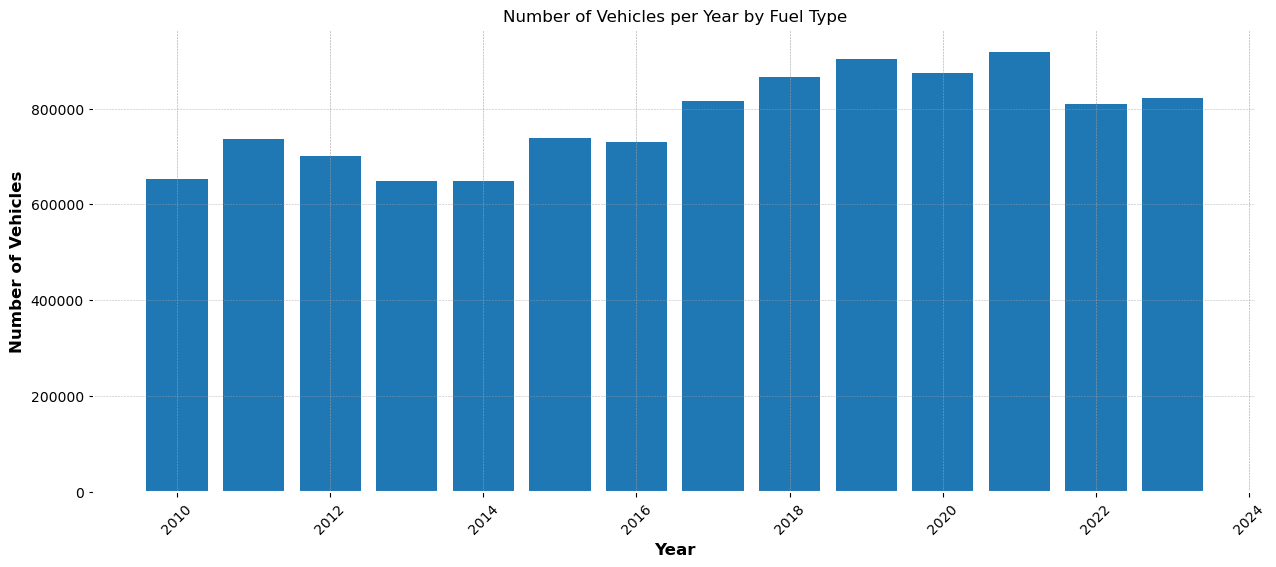

In [94]:



import matplotlib.pyplot as plt

# Count the number of vehicles per year
df_filtered['Jaar'] = df_filtered['Datum eerste toelating'].dt.year
vehicle_counts = df_filtered.groupby('Jaar').size()

# Filter out unrealistic years (before 1950)
vehicle_counts = vehicle_counts[(vehicle_counts.index <= 2023)]

# Plot the number of vehicles per year as a bar chart
plt.figure(figsize=(15, 6))
plt.bar(vehicle_counts.index, vehicle_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Year by Fuel Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

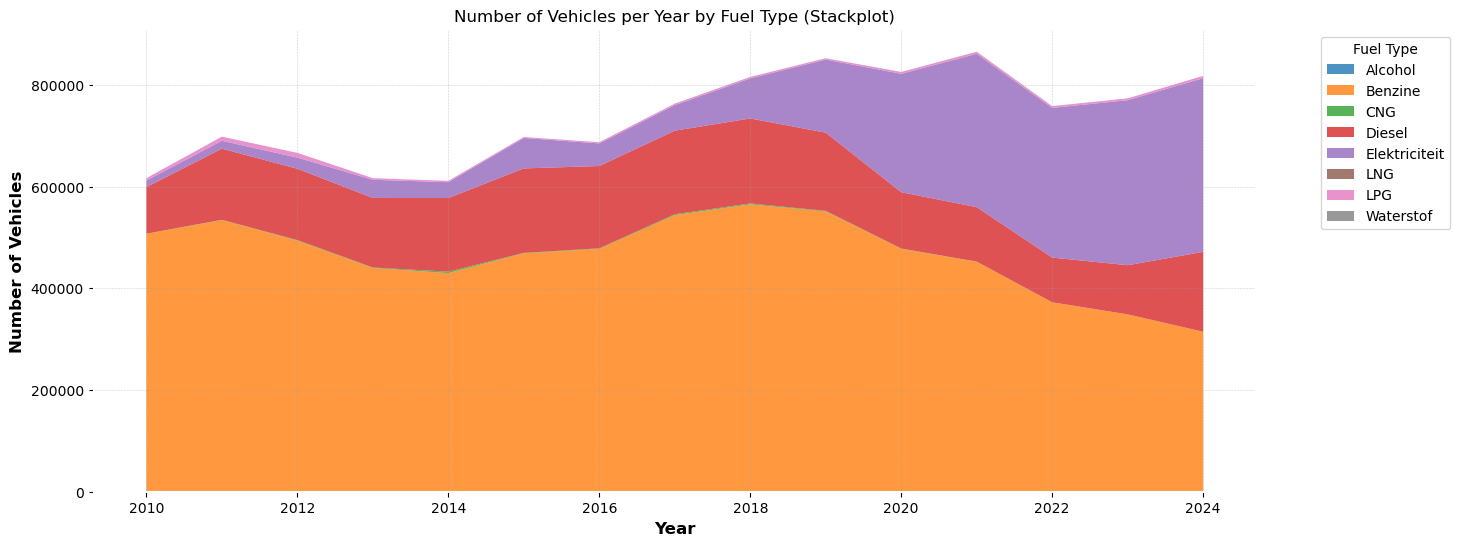


Total Count of Vehicles by Fuel Type:
Brandstof omschrijving
Benzine          7024362
Elektriciteit    2048459
Diesel           2029818
LPG                59190
CNG                12771
Alcohol             2499
LNG                 1427
Waterstof            929
Name: count, dtype: int64


In [95]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by year and fuel type ('Brandstof omschrijving'), count the number of vehicles per year
fuel_counts = df_filtered.groupby(['Year', 'Brandstof omschrijving']).size().unstack()

# Plot the stackplot
plt.figure(figsize=(15, 6))
plt.stackplot(fuel_counts.index, fuel_counts.T, labels=fuel_counts.columns, alpha=0.8)

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles per Year by Fuel Type (Stackplot)')
plt.legend(title='Fuel Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Create a table counting all different fuel types
fuel_summary = df_filtered['Brandstof omschrijving'].value_counts()

# Print the fuel summary table
print("\nTotal Count of Vehicles by Fuel Type:")
print(fuel_summary)



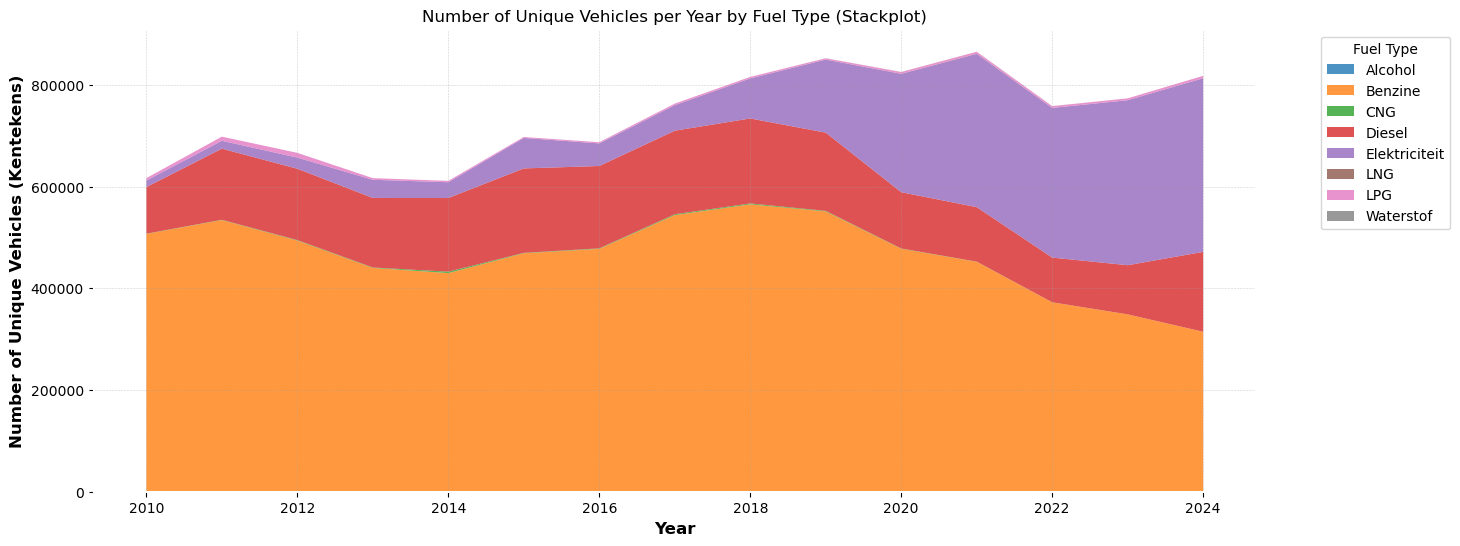


Total Count of Unique Vehicles (Kentekens) by Fuel Type:
Brandstof omschrijving
Alcohol             2499
Benzine          7024362
CNG                12771
Diesel           2029818
Elektriciteit    2048459
LNG                 1427
LPG                59190
Waterstof            929
Name: Kenteken, dtype: int64


In [115]:
import matplotlib.pyplot as plt

# Group by year and fuel type, count unique license plates ('Kenteken') per year
fuel_counts = df_filtered.groupby(['Year', 'Brandstof omschrijving'])['Kenteken'].nunique().unstack()

# Plot the stackplot
plt.figure(figsize=(15, 6))
plt.stackplot(fuel_counts.index, fuel_counts.T, labels=fuel_counts.columns, alpha=0.8)

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Number of Unique Vehicles (Kentekens)')
plt.title('Number of Unique Vehicles per Year by Fuel Type (Stackplot)')
plt.legend(title='Fuel Type', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Create a table counting unique license plates per fuel type
fuel_summary = df_filtered.groupby('Brandstof omschrijving')['Kenteken'].nunique()

# Print the fuel summary table
print("\nTotal Count of Unique Vehicles (Kentekens) by Fuel Type:")
print(fuel_summary)


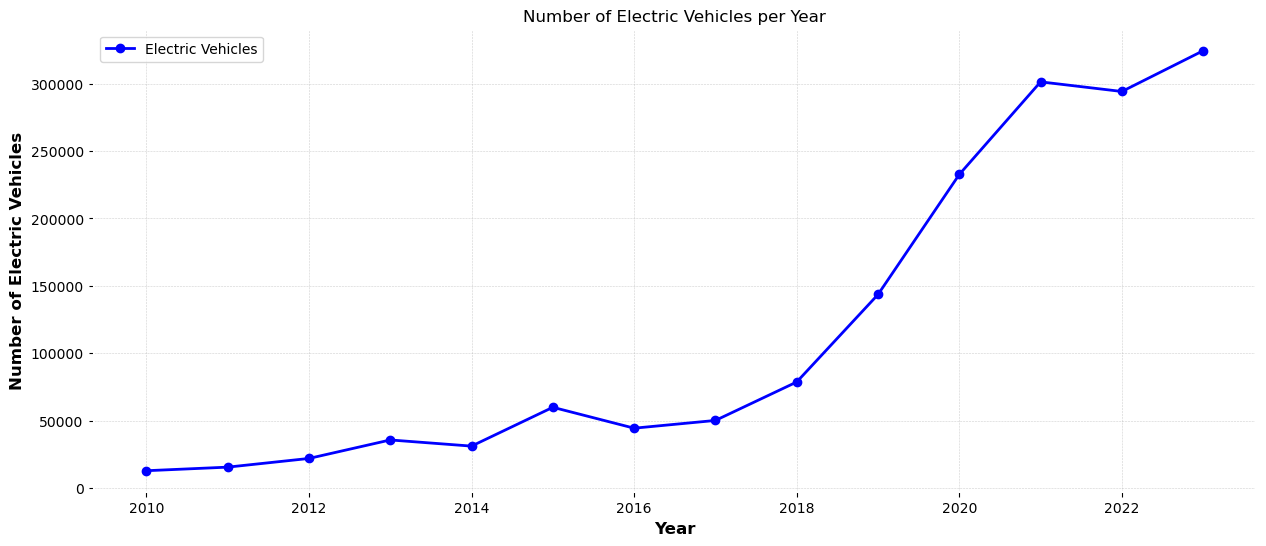

In [102]:
# Filter for only electric cars
df_electric = df_filtered[df_filtered['Brandstof omschrijving'].str.contains('Elektriciteit', na=False, case=False)]

# Group by year and count the number of electric vehicles per year
electric_counts = df_electric.groupby('Year').size()
# Filter for years before 2024
electric_counts = electric_counts[electric_counts.index < 2024]

# Plot the line chart for electric vehicles only
plt.figure(figsize=(15, 6))
plt.plot(electric_counts.index, electric_counts.values, marker='o', linestyle='-', color='blue', label='Electric Vehicles')

# Labels and formatting
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles per Year')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()